In [1663]:
# Add noise to a simple signal given by a sum of two sine waves. 

dt =1/44100
t = np.arange(0, 1,dt)
f0 = 200
f1 = 500

x = 0.7 * sin(2 * pi * f0 * t) + 0.3 * sin(2 * pi * f1 * t)
x_clean = x

##add noise into the clean signal
x = x + 2.5 * np.random.randn(len(t))

play(x_clean)
play(x)


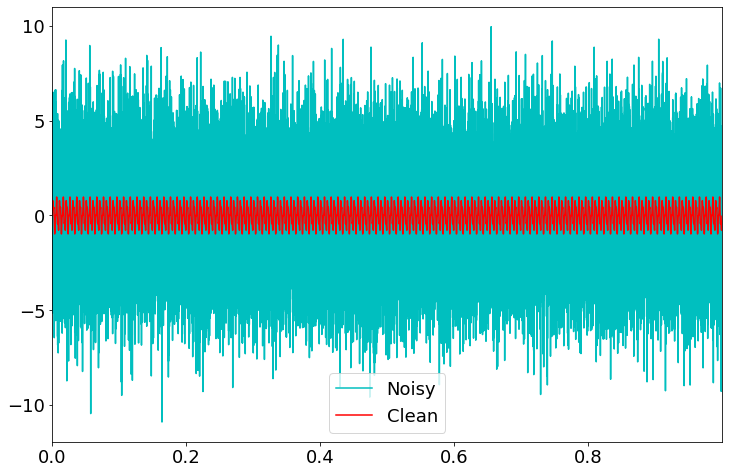

In [1664]:
plt.rcParams['figure.figsize']=[12,8]
plt.rcParams.update({'font.size':18})
#plot two singals
plt.plot(t, x, color = 'c',  label ='Noisy' )
plt.plot(t, x_clean, color = 'r',  label ='Clean' )
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

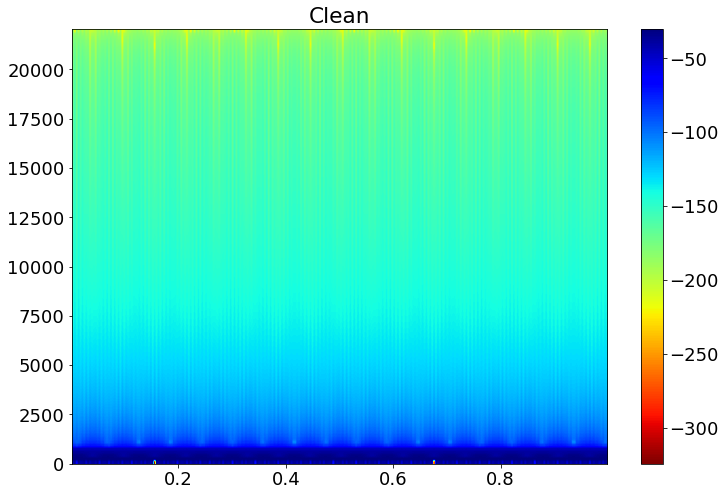

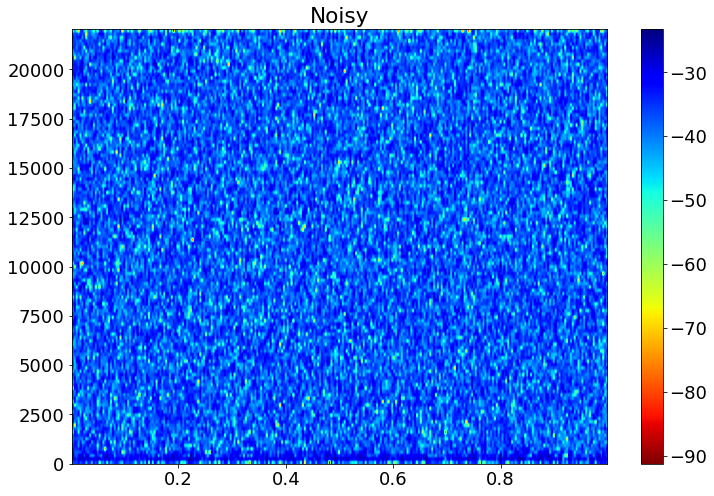

In [1665]:
plt.specgram(x_clean,NFFT=256,Fs=1/dt,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.title('Clean')
plt.show()

plt.specgram(x,NFFT=256,Fs=1/dt,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.title('Noisy')
plt.show()

# after adding noise into the signal, it's hard to hear the original Clean signal
# it's also hard to see the original signal in the spectrum of the Noisy signal
# my mission is to seperate the Clean signal from the Noisy signal

In [1666]:
# compute FFT and PSD manually 
n = len(t)
fhat = np.fft.fft(x, n) # complex values of Fourier coeficients include magnitude and phase
# Power Spectral Density is computed by multiplying each frequency bin in an FFT by its complex conjugate 
# which results in the real only spectrum of amplitude in g.  
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n) # x-axis of frequency
L =  np.arange(1,np.floor(n/64), dtype = 'int'  ) # plot 1/64 to zoom in 


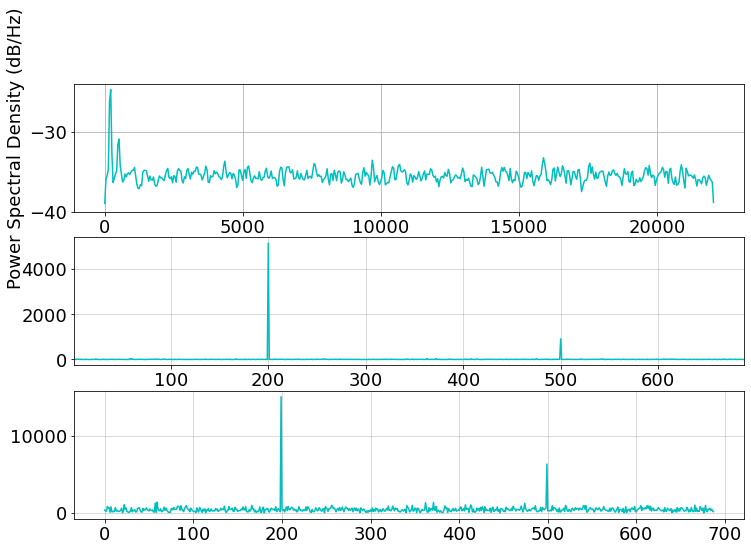

In [1667]:

#plot in three different ways

fig, axs=plt.subplots(3,1)

#plot the PSD with the .psd function
plt.sca(axs[0])
axs[0].grid(which="minor",alpha=0.6)
axs[0].psd(x, NFFT=1024, Fs=1/dt, noverlap=100,color = 'c')

#axs[1].set_xticks(np.arange(50,100,50)) 

plt.sca(axs[1])
plt.plot(freq[L], PSD.real[L], color = 'c' )
plt.xlim(freq[L[0]],freq[L[-1]])
axs[1].grid(which="major",alpha=0.6)

plt.sca(axs[2])
spectrum = np.fft.fft(x[0:n])
magSpec = abs(spectrum)
axs[2].grid(which="major",alpha=0.6)
plt.plot(magSpec[L],color = 'c' )

#peakIndex = np.argmax(magSpec[L])
#print("peakIndex =", peakIndex)
plt.show()

# i can see the peak of the power density is close to 200 and 500

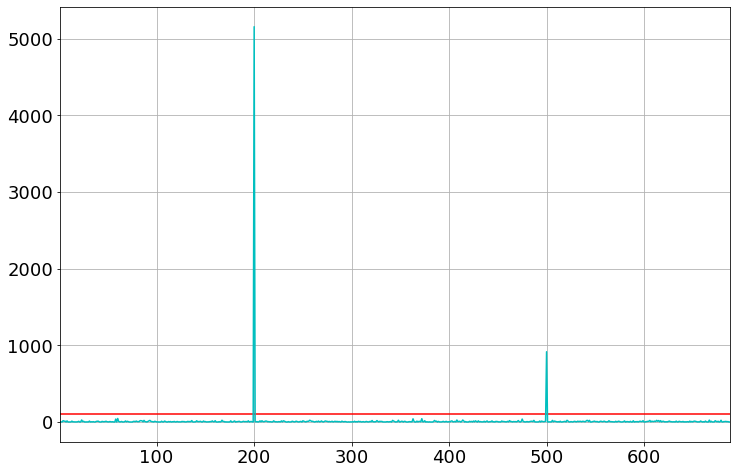

In [1668]:
#zoom in to see 
L =  np.arange(1,np.floor(n/64), dtype = 'int'  )
plt.plot(freq[L], PSD.real[L], color = 'c',  label ='Noisy' )
plt.xlim(freq[L[0]],freq[L[-1]])
plt.grid()
plt.hlines(y=100, xmin=0, xmax=700,color = 'r')

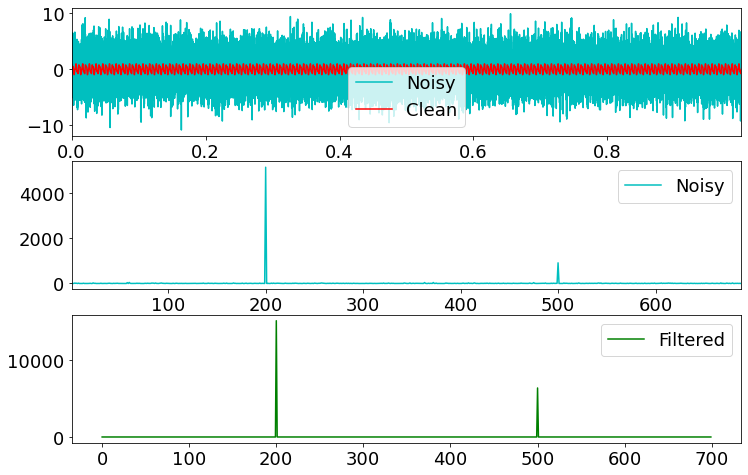

In [1669]:
#find the peak frequencies
indices = PSD>100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,x,color='c',label='Noisy')
plt.plot(t,x_clean,color='r',label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])

spectrum=np.fft.fft(ffilt)
magspectrum = abs(spectrum)
plt.plot(magspectrum[0:700],color='g',label='Filtered')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD.real[L],color='c',label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

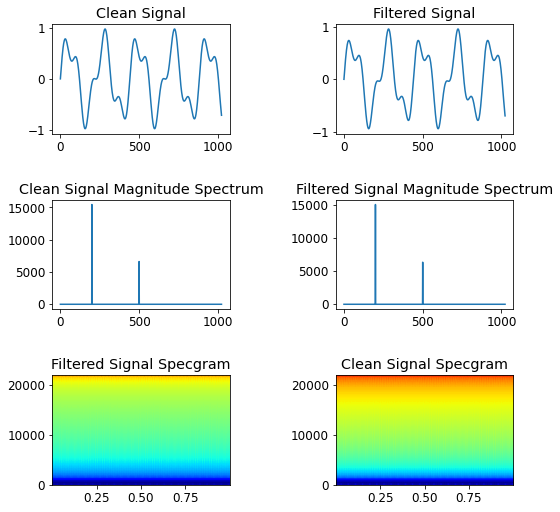

In [1670]:
play(ffilt.real)
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams.update({'font.size':12})

fig,axs = plt.subplots(3,2)

plt.sca(axs[0,0])
plt.plot(x_clean[0:1024])
plt.title('Clean Signal')

plt.sca(axs[0,1])
plt.plot(ffilt.real[0:1024])
plt.title('Filtered Signal')

plt.sca(axs[1,0])
spectrum = np.fft.fft(x_clean[0:n])
magSpec = abs(spectrum)
plt.plot(magSpec[0:1024])
plt.title('Clean Signal Magnitude Spectrum')

plt.sca(axs[1,1])
spectrum = np.fft.fft(ffilt[0:n])
magSpec = abs(spectrum)
plt.plot(magSpec[0:1024])
plt.title('Filtered Signal Magnitude Spectrum')

plt.sca(axs[2,0])
plt.specgram(x_clean,NFFT=128,Fs=1/dt,sides= 'onesided' ,noverlap=100,cmap='jet_r')
#plt.colorbar()
plt.title('Filtered Signal Specgram')

plt.sca(axs[2,1])
plt.specgram(ffilt,NFFT=128,Fs=1/dt,sides= 'onesided' ,noverlap=100,cmap='jet_r')
#plt.colorbar()
plt.title('Clean Signal Specgram')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.show()

In [1671]:
##################################################################

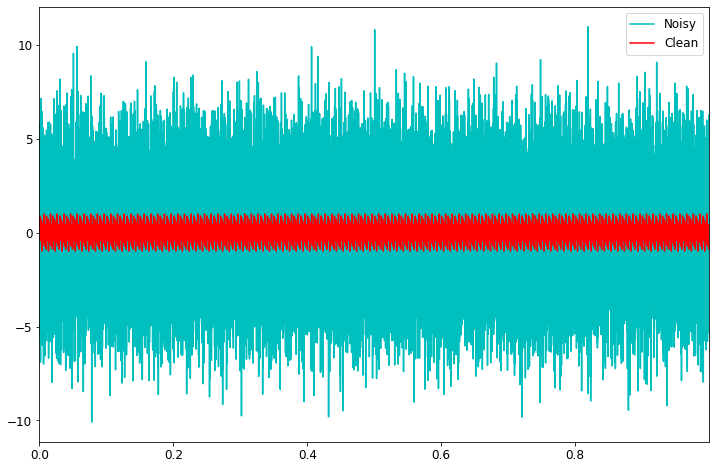

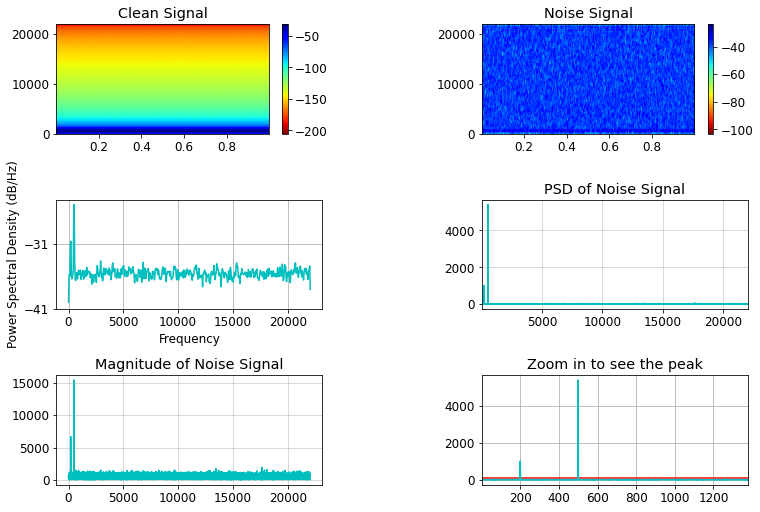

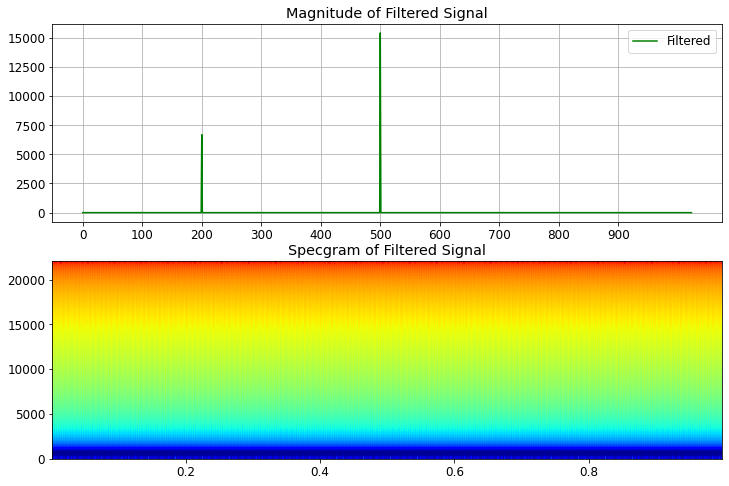

In [1677]:
#make a one-click block for running quick test


f0 = 200
f1 = 500

x_clean = 0.3 * sin(2 * pi * f0 * t) + 0.7 * sin(2 * pi * f1 * t)
x_noise = x_clean + 2.5 * np.random.randn(len(t))

play(x_clean)
play(x_noise)

plt.rcParams['figure.figsize']=[12,8]

plt.plot(t, x_noise, color = 'c',  label ='Noisy' )
plt.plot(t, x_clean, color = 'r',  label ='Clean' )
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

# compute FFT and PSD manually 

fhat = np.fft.fft(x_noise, n) 
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n) # x-axis of frequency
L =  np.arange(1,np.floor(n/2), dtype = 'int'  ) # plot 1/2 to zoom in 

fig,axs = plt.subplots(3,2)

plt.sca(axs[0,0])
plt.specgram(x_clean,NFFT=128,Fs=1/dt,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.title('Clean Signal')

plt.sca(axs[0,1])
plt.specgram(x_noise,NFFT=128,Fs=1/dt,sides= 'onesided' ,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.title('Noise Signal')

plt.sca(axs[1,0])
axs[1,0].grid(which="minor",alpha=0.6)
axs[1,0].psd(x_noise, NFFT=1024, Fs=1/dt, noverlap=100,color = 'c')


plt.sca(axs[1,1])
plt.plot(freq[L], PSD.real[L], color = 'c' )
plt.xlim(freq[L[0]],freq[L[-1]])
axs[1,1].grid(which="major",alpha=0.6)
plt.title('PSD of Noise Signal' )

plt.sca(axs[2,0])
spectrum = np.fft.fft(x_noise[0:n])
magSpec = abs(spectrum)
axs[2,0].grid(which="major",alpha=0.6)
plt.plot(magSpec[L],color = 'c' )
plt.title('Magnitude of Noise Signal' )

#zoom in to see 
plt.sca(axs[2,1])
L =  np.arange(1,np.floor(n/32), dtype = 'int'  )
plt.plot(freq[L], PSD.real[L], color = 'c',  label ='Noisy' )
plt.xlim(freq[L[0]],freq[L[-1]])
plt.grid()
plt.hlines(y=100, xmin=0, xmax=2000,color = 'r')
plt.title('Zoom in to see the peak' )

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.show()

indices = PSD>100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

fig,axs = plt.subplots(2,1)


plt.sca(axs[0])

spectrum=np.fft.fft(ffilt)
magspectrum = abs(spectrum)
plt.plot(magspectrum[0:1024],color='g',label='Filtered')
axs[0].grid()
axs[0].set_xticks(np.arange(0,1000,100)) 
plt.legend()
plt.title('Magnitude of Filtered Signal' )

plt.sca(axs[1])
plt.specgram(ffilt,NFFT=128,Fs=1/dt,sides= 'onesided' ,noverlap=100,cmap='jet_r')
#plt.colorbar()
plt.title('Specgram of Filtered Signal')
play(ffilt.real)
plt.show()

In [ ]:
##################################################################

C:\Users\ilove\Documents\sns\config\PMClibs.py:47: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [rate, samps] = wavfile.read(filename)


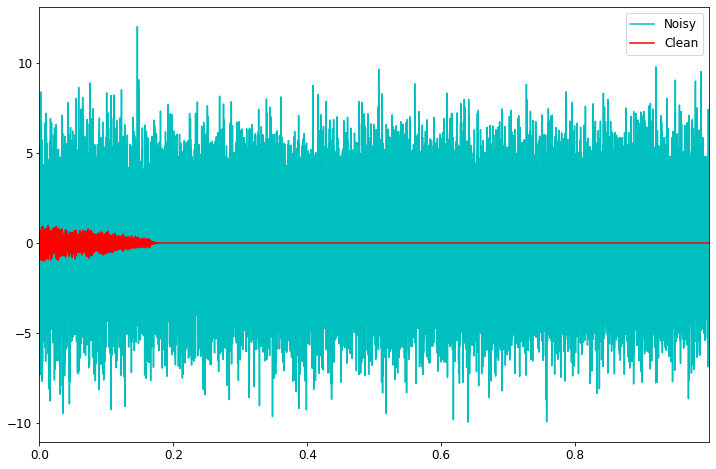

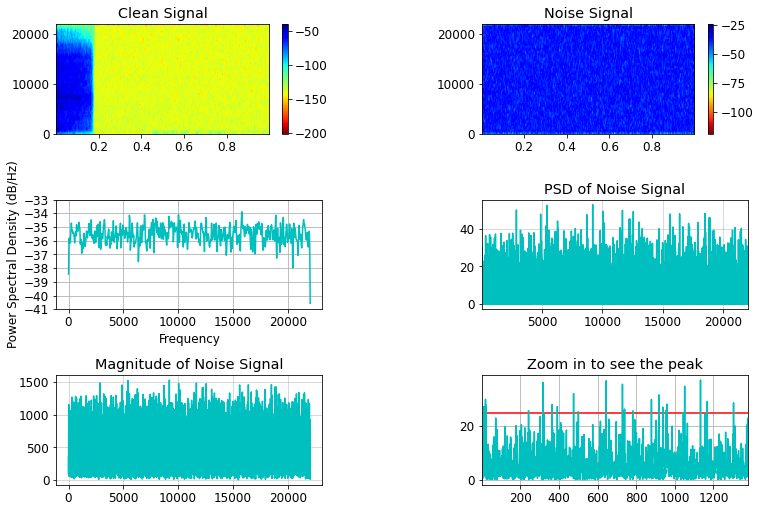

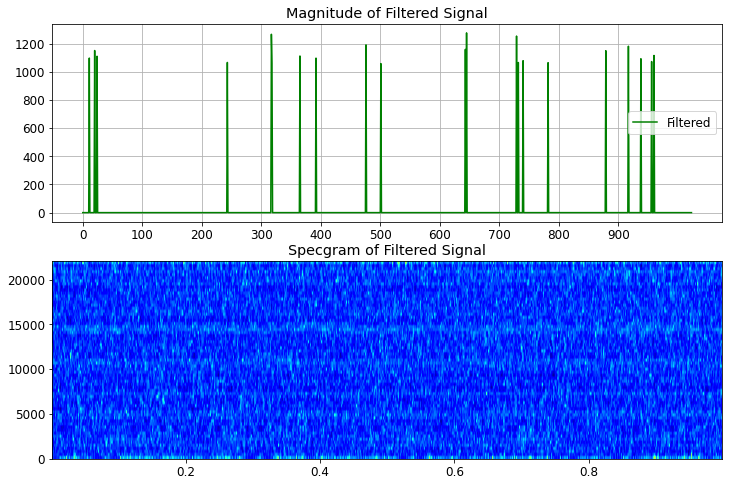

In [1673]:
# test with real world sound

mySound = wavReadMono("C:/Users/ilove/Desktop/tmp_01.wav")

dt =1/44100
t = np.arange(0, 1,dt)
x_clean = mySound[0:len(t)]
x_noise = x_clean + 2.5 * np.random.randn(len(t))


play(x_clean)
play(x_noise)

plt.rcParams['figure.figsize']=[12,8]

plt.plot(t, x_noise, color = 'c',  label ='Noisy' )
plt.plot(t, x_clean, color = 'r',  label ='Clean' )
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

# compute FFT and PSD manually 

fhat = np.fft.fft(x_noise, n) 
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n) # x-axis of frequency
L =  np.arange(1,np.floor(n/2), dtype = 'int'  ) # plot 1/2 to zoom in 

fig,axs = plt.subplots(3,2)

plt.sca(axs[0,0])
plt.specgram(x_clean,NFFT=128,Fs=1/dt,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.title('Clean Signal')

plt.sca(axs[0,1])
plt.specgram(x_noise,NFFT=128,Fs=1/dt,sides= 'onesided' ,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.title('Noise Signal')

plt.sca(axs[1,0])
axs[1,0].grid(which="minor",alpha=0.6)
axs[1,0].psd(x_noise, NFFT=1024, Fs=1/dt, noverlap=100,color = 'c')


plt.sca(axs[1,1])
plt.plot(freq[L], PSD.real[L], color = 'c' )
plt.xlim(freq[L[0]],freq[L[-1]])
axs[1,1].grid(which="major",alpha=0.6)
plt.title('PSD of Noise Signal' )

plt.sca(axs[2,0])
spectrum = np.fft.fft(x_noise[0:n])
magSpec = abs(spectrum)
axs[2,0].grid(which="major",alpha=0.6)
plt.plot(magSpec[L],color = 'c' )
plt.title('Magnitude of Noise Signal' )

#zoom in to see 
plt.sca(axs[2,1])
L =  np.arange(1,np.floor(n/32), dtype = 'int'  )
plt.plot(freq[L], PSD.real[L], color = 'c',  label ='Noisy' )
plt.xlim(freq[L[0]],freq[L[-1]])
plt.grid()
plt.hlines(y=25, xmin=0, xmax=2000,color = 'r')
plt.title('Zoom in to see the peak' )

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.show()

indices = PSD>25
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

fig,axs = plt.subplots(2,1)


plt.sca(axs[0])

spectrum=np.fft.fft(ffilt)
magspectrum = abs(spectrum)
plt.plot(magspectrum[0:1024],color='g',label='Filtered')
axs[0].grid()
axs[0].set_xticks(np.arange(0,1000,100)) 
plt.legend()
plt.title('Magnitude of Filtered Signal' )

plt.sca(axs[1])
plt.specgram(ffilt,NFFT=128,Fs=1/dt,sides= 'onesided' ,noverlap=100,cmap='jet_r')
#plt.colorbar()
plt.title('Specgram of Filtered Signal')
play(ffilt.real)
plt.show()